In [1]:
import pandas as pd
import gmplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('TransitData.xlsx')

In [3]:
df.head()
    

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
0,2017-10-13,1900-01-01 03:03:05,ADULT,Exact Fare,1359,1,44.241325,-76.487697
1,2017-10-28,1900-01-01 03:03:06,QUEENS,Exact Fare,622,1,44.227135,-76.495527
2,2017-10-28,1900-01-01 03:03:08,QUEENS,Exact Fare,622,1,44.227135,-76.495527
3,2017-10-28,1900-01-01 03:03:34,QUEENS,Exact Fare,622,1,44.227827,-76.497048
4,2017-10-20,1900-01-01 03:03:35,ADULT,Pass (Multi-ride card),1688,1,44.239152,-76.485933


In [4]:
date=df['Date']

In [5]:
weekday=[ i.strftime("%w") for i in date]

In [6]:
monthday=[i.strftime("%d") for i in date]

In [7]:
time=df['Time']

In [8]:
hour = [i.strftime("%H") for i in time]

In [9]:
minute=[i.strftime("%M") for i in time]

In [10]:
newdf=df.copy()

In [11]:
newdf['weekday']=weekday
newdf['monthday']=monthday
newdf['hour']=hour
newdf['minute']=minute

In [12]:
newdf.drop(['Bus','Date','Time'],axis=1, inplace=True)

In [13]:
newdf['Class']=[i.lower() for i in newdf['Class']]

In [14]:
newdf

,Class,Operation,Route,Latitude,Longitude,weekday,monthday,hour,minute
0,adult,Exact Fare,1,44.241325,-76.487697,5,13,03,03
1,queens,Exact Fare,1,44.227135,-76.495527,6,28,03,03
2,queens,Exact Fare,1,44.227135,-76.495527,6,28,03,03
3,queens,Exact Fare,1,44.227827,-76.497048,6,28,03,03
4,adult,Pass (Multi-ride card),1,44.239152,-76.485933,5,20,03,03
...,...,...,...,...,...,...,...,...,...
704534,transpass,Pass (Multi-ride card),701,44.232060,-76.491380,5,27,23,45
704535,youth,Pass (Multi-ride card),701,44.243758,-76.495127,1,30,23,45
704536,student,Pass (Multi-ride card),701,44.232057,-76.491352,6,28,23,45
704537,youth,Pass (Multi-ride card),701,44.243750,-76.495208,5,20,23,47


In [15]:
weekday_grp=newdf.groupby("weekday")['monthday'].count()
hour_grp=newdf.groupby("hour")['weekday'].count()
class_grp=newdf.groupby("Class")['weekday'].count()
route_grp=newdf.groupby("Route")['weekday'].count()

In [16]:
class_grp

Class
adult          194365
child           31516
commuter         7241
queens         219294
senior          28070
st lawrence     87374
student         65591
transpass       45460
youth           25628
Name: weekday, dtype: int64

In [17]:
weekday_names=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
hour_label=list(range(0,24))
class_names=['Adult','Child','Commuter','Queens','Senior','SLC','Student','TransitPass','Youth']
route_id=set(newdf['Route'])

In [18]:
hgrp=np.array(list(range(0,24)))

In [19]:
for i in range(0,23):
    if i<4:
        hgrp[i]=hour_grp[i]
    else:
        hgrp[i+1]=hour_grp[i]
    

In [20]:
hgrp[4]=0

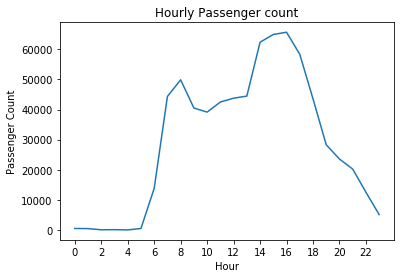

In [21]:
plt.plot(hour_label,hgrp)
plt.title('Hourly Passenger count')
plt.xlabel('Hour')
plt.ylabel('Passenger Count')
plt.xticks(np.arange(0,24,2))
plt.show()

In [22]:
class_grp2=newdf.groupby("Class")['weekday'].count()

In [23]:
class_grp2=[ (i*100)/len(newdf) for i in class_grp2]

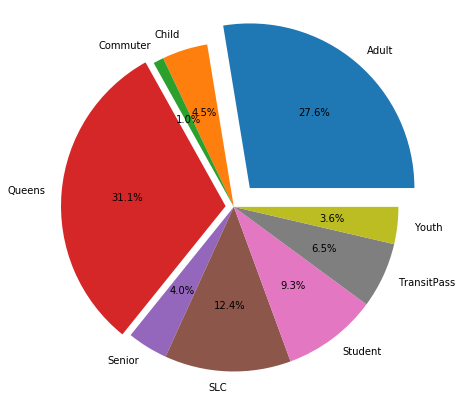

In [24]:
fig1,ax1=plt.subplots(figsize=(7,7))
explode=(0.15,0,0,0.05,0,0,0,0,0)
ax1.pie(class_grp2,explode=explode,labels=class_names,shadow=False,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

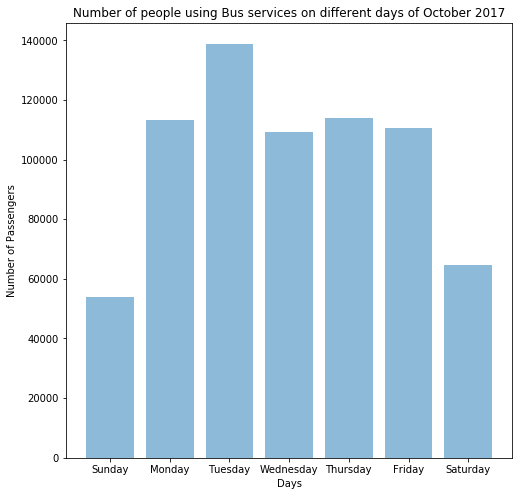

In [25]:
fig2,ax2=plt.subplots(figsize=(8,8))
ax2.bar(weekday_names,weekday_grp,align='center',alpha=0.5)
plt.xlabel('Days')
plt.ylabel('Number of Passengers')
plt.title('Number of people using Bus services on different days of October 2017')
plt.show()

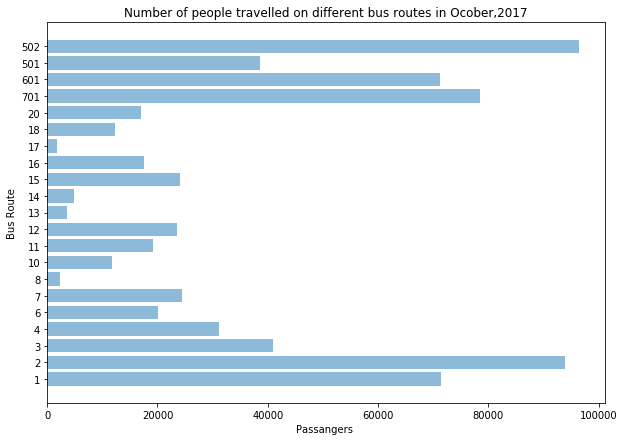

In [26]:
route_id=list(route_id)
route_id=[str(i) for i in route_id]
n_route=np.arange(len(route_id))


fig3,ax3=plt.subplots(figsize=(10,7))
ax3.barh(route_id,route_grp,align='center',alpha=0.5)
plt.yticks(n_route,route_id)
plt.xlabel('Passangers ')
plt.ylabel('Bus Route')
plt.title('Number of people travelled on different bus routes in Ocober,2017')
plt.show()